# Tutorium Programmieren (Prof. Dr. Ralf Gerlich)
# Aufgabenblatt 8: Labyrinth lösen mit DFS

## Einführung

In dieser Aufgabe werden Sie eine Funktion implementieren, die eine [Tiefensuche](https://de.wikipedia.org/wiki/Tiefensuche) (Depth-First Search, DFS) durchführt, um einen Weg von einem Startpunkt zu einem Endpunkt in einem vorgegebenen Labyrinth zu finden.

### Motivation

Die Tiefensuche ist ein leistungsfähiges Verfahren, das in vielen Bereichen der Künstlichen Intelligenz eingesetzt wird, um Probleme zu lösen, die das Durchsuchen und Analysieren von großen Zustandsräumen erfordern.

#### Beispielanwendungen:
- **Lösung von Labyrinthen:** Finden eines Weges durch ein Labyrinth.
- **Topologisches Sortieren:** Sortieren von Knoten in einem gerichteten Graphen (z.B. Reihenfolge bei der Installation von Softwarepaketen).
- **Erkennung von Zyklen:** Prüfung, ob ein Graph (z.B. ein Computernetzwerk oder ein Kontrollflussgraph eines Programms) Schleifen enthält.
- **Komponentenverbindung:** Prüfung, ob in einem Graphen (z.B. einem Computernetzwerk) jeder Knoten mit jedem anderen direkt oder indirekt verbunden ist.

#### Vorteile:
- **Einfach zu implementieren:** Besonders mit Rekursion leicht umsetzbar.
- **Speicherökonomisch:** Verbraucht im Vergleich zu anderen Suchalgorithmen weniger Speicher, wenn das zu lösende Problem groß ist.
- **Pfadfindung:** Gut geeignet, um Pfade oder Lösungen in Szenarien wie Labyrinthen zu finden.

#### Nachteile:
- **Nicht die kürzeste Route:** DFS garantiert nicht die kürzeste Route zwischen zwei Punkten.
- **Kann ineffizient sein:** Im ungünstigsten Fall müssen alle Knoten im Graphen (z.B. Orte im Labyrinth) besucht werden, bevor eine Lösung gefunden wird.

Effizientere Alternativen zur Tiefensuche sind etwa der [Dijkstra-](https://de.wikipedia.org/wiki/Dijkstra-Algorithmus) oder der [A*-Algorithmus](https://de.wikipedia.org/wiki/A*-Algorithmus). Diese sind auch in der Lage, den kürzesten (oder kostengünstigsten) Weg zwischen zwei Punkten zu finden. [Hier](https://www.youtube.com/watch?v=aW9kZcJx64o) können Sie in einem Video einen Vergleich dieser Algorithmen finden.

### Darstellung eines Labyrinths

Wir können ein Labyrinth als eine Liste von Strings darstellen:


        maze = [
            "#########",
            "#       #",
            "# ##### #",
            "# #   # #",
            "# # # # #",
            "#   #   #",
            "#########"
        ]

Diese Liste enthällt Strings.

**Wände** werden mit ``'#'`` dargestellt.

**Offene Pfade** werden mit ``' '`` dargestellt.

Der **Startpunkt** wird mit ``'S'`` dargestellt.

Der **Endpunkt** wird mit ``'E'`` dargestellt.

Die **besuchten Pfade** werden mit ``'.'`` dargestellt.


Beispiel:


        maze = [
            "#########",
            "#S      #",
            "#.##### #",
            "#.#...# #",
            "#.#.#.# #",
            "#...#..E#",
            "#########"
        ]
Das folgende Bild zeigt die Darstellung dieses gelösten Labyrinths:
- Blau ist der Startpunt
- Grün ist der gewählte Weg
- Rot ist der Endpunkt, also unser Ziel

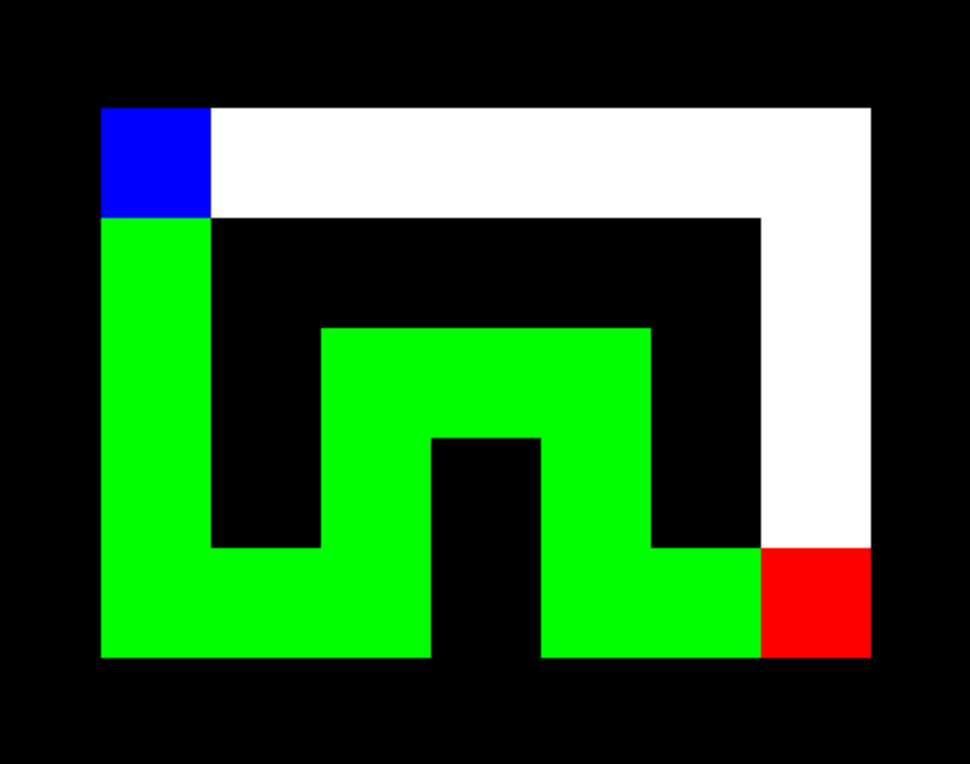

### Ablauf der Tiefensuche in einem Labyrinth

Das Ziel der Tiefensuche ist es, einen Weg von einem Startpunkt zu einem Zielpunkt zu finden, falls ein solcher existiert.

1. **Initialisierung:**

  Beginnen Sie bei einem Startpunkt im Labyrinth. Dieser Punkt ist mit ``'S'`` markiert.
  
  Markieren Sie diesen Punkt nun mit ``'.'`` als besucht, um anzuzeigen, dass Sie diesen Punkt bereits erkundet haben.

2. **Wegsuche:**

  Betrachten Sie von Ihrem aktuellen Standpunkt aus nacheinander alle direkt angrenzenden Zellen (oben, unten, links, rechts).
  Für jede angrenzende Zelle:
  - Wenn es eine Wand ist oder schon besucht wurde, ignorieren Sie diese Richtung.
  - Wenn es ein offener Pfad ist und es der Endpunkt ist, haben Sie den Zielpunkt erreicht.
  - Wenn es ein offener Pfad ist und nicht der Endpunkt, rufen Sie die DFS-Funktion rekursiv für diese Zelle auf.

  Auf diese Weise wird jeder mögliche vom Start ausgehende Weg nacheinander systematisch abgearbeitet, bis das Ziel erreicht wurde.

3. **Rekursion und Backtracking:**

  Die DFS-Funktion wird rekursiv aufgerufen, um tiefer in das Labyrinth zu gehen. Dies setzt sich fort, bis entweder das Ziel gefunden ist oder keine weiteren unbesuchten offenen Zellen mehr vorhanden sind.
  Wenn das Ziel nicht gefunden wird und keine weiteren Zellen zu erkunden sind, kehrt die Funktion zurück und signalisiert, dass kein Weg gefunden wurde. Die aufrufende Funktion probiert dann den nächsten möglichen Weg. Dieses Prinzip bezeichnet man auch als *Backtracking*, da so dem bisher erkundeten Pfad rückwärts gefolgt wird, bis man einen Punkt erreicht, an dem noch unerkundete Pfade abzweigen.

  Bei Backtracking sollen Sie die Pfade, die bereits besucht wurden, aber nicht erfolgreich waren, gesondert mit `'X'` markiert werden. Diese Markierungen helfen zu visualisieren, welche Wege bereits untersucht wurden.
  
  Betreten Sie keine Wege, die mit `'X'` markiert wurden.
  
4. **Beendigung:**

  Der Prozess endet, wenn entweder das Ziel gefunden wurde (Erfolg) oder alle möglichen Wege erkundet wurden, ohne das Ziel zu erreichen (Fehlschlag).

#### Pseudocode
Das folgende Code-Fragment illustriert den grundsätzlichen Ablauf.

```python
def dfs(maze, x, y, end_x, end_y, path):
    # Überprüfe, ob die aktuelle Position außerhalb der Grenzen des Labyrinths liegt oder ob sie eine Wand ist, oder ob sie mit 'X' bereits markiert wurde
        # Kein gültiger Zug => kehre zurück mit FALSCH
        
    # Überprüfe, ob die aktuelle Position das Ziel ist
        # Füge die Zielposition zum Pfad hinzu
        # Das Ziel wurde erreicht => kehre zurück mit WAHR
        
    # Überprüfe, ob die aktuelle Zelle schon Teil des Pfades ist oder als besucht markiert wurde mit '.' oder 'X'
        # Die Zelle wurde bereits besucht => kehre zurück mit FALSCH
        
    # Markiere die aktuelle Zelle als besucht, indem du sie mit '.' markierst
    # Füge die aktuelle Position zum Pfad hinzu
    
    # Rekursive DFS-Suche in alle vier Richtungen (unten, oben, rechts, links) // siehe 3.Rekursion und Backtracking
        # Wenn einer der Aufrufe mit WAHR zurückkehrt, wurde ein zulässiger Weg gefunden => kehre zurück mit WAHR
        
    # Entferne die aktuelle Position vom Pfad
    # Ersetzt die aktuelle Zelle mit 'X', um sie als Sackgasse zu markieren
    # Kehre zurück mit FALSCH, da kein Pfad durch diese Zelle führt
```

## Aufgabenstellung

Implementieren Sie nur die Funktion **``dfs(maze, x, y, end_x, end_y, path)``**.

Bitte ändern Sie den sonstigen Code nicht für die Abgabe.

**Erklärung der Input-Parameter:**
- **`maze`**: Eine Liste von Listen, die das Labyrinth darstellt (zu Erläuterung siehe oben).
- **`x, y`**: Aktuelle Koordinaten im Labyrinth.
- **`end_x, end_y`**: Zielkoordinaten.
- **`path`**: Liste, die den Pfad speichert, der während der Suche gefunden wird.

### Beispielhafte Manipulierung von Maze und Path (Optional)

**``maze[x][y]``**: Gibt den Wert der Zelle an der Position (x, y) im Labyrinth zurück. Dieser Wert kann anzeigen, ob es sich um eine Wand (``'#'``), einen freien Weg (``' '``) oder einen besuchten Punkt mit (``'.'``) handelt.

**``maze[x][y] = '.'``**: Setzt die Zelle an der Position (x, y) auf ``'.'``, was bedeutet, dass diese Zelle als bereits besuchte Zelle markiert wird.

**``path.append((x, y))``**:  Fügt das Tupel (x, y), welches die aktuelle Position repräsentiert, zur Liste `path` hinzu. Dies dient dazu, den zurückgelegten Weg zu verfolgen.

**``path.pop()``**:  Entfernt das zuletzt mit `append` hinzugefügte Element aus der Liste `path`. Dies wird typischerweise verwendet, um einen Schritt im Pfad rückgängig zu machen, wenn ein Rückzug (Backtracking) stattfindet, weil kein weiterer Fortschritt möglich ist.

**``len(maze)``**: gibt die Anzahl der Zeilen im Labyrinth zurück. Kann verwendet werden, um zu überprüfen, ob sich ``x`` innerhalb des Labyrinths befindet.

**``len(maze[0])``**: gibt die Länge des ersten Elements in der Liste zurück. Kann verwendet werden, um zu überprüfen, ob sich ``y`` innerhalb des Labyrinths befindet.

### Ihre Aufgabe: DFS implementieren

In [6]:
def dfs(maze, x, y, end_x, end_y, path):
    if x > len(maze) or y > len(maze[0]) or maze[x][y] == "X" or maze[x][y] == "#":
        return False
    if x == end_x and y == end_y:
        path.append((x,y))
        return True
    if (x,y) in path or maze[x][y]=="." or maze[x][y]=="#":
        return False
    maze[x][y]="."
    path.append((x,y))
    if dfs(maze, x+1, y, end_x, end_y, path): return True
    elif dfs(maze, x-1, y, end_x, end_y, path): return True
    elif dfs(maze, x, y+1, end_x, end_y, path): return True
    elif dfs(maze, x, y-1, end_x, end_y, path): return True
    path.pop()
    maze[x][y]="#"
    return False



### Vorgegebener Code (nicht ändern)

Kein Weg gefunden von (1, 15) nach (9, 17)
Weg gefunden von (1, 2) nach (9, 17)


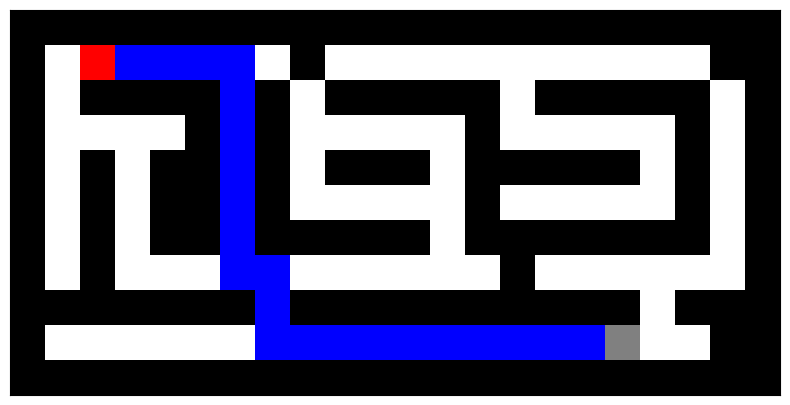

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def print_maze(maze, start, end):
    color_map = {'#': 0, ' ': 1, '.': 2, 'S': 3, 'E': 4, 'X': 5}
    maze[start[0]][start[1]] = 'S'
    maze[end[0]][end[1]] = 'E'
    maze_color = np.array([[color_map[cell] for cell in row] for row in maze])
    cmap = ListedColormap(['black', 'white', 'lime', 'blue', 'red', 'gray'])

    plt.figure(figsize=(10, 5))
    plt.imshow(maze_color, cmap=cmap, interpolation='nearest')
    plt.xticks([]), plt.yticks([])
    plt.show()

# Gegebenes Labyrinth
maze = [
    "######################",
    "#       #           ##",
    "# #### # ##### ##### #",
    "#    # #     #     # #",
    "# # ## # ### ##### # #",
    "# # ## #     #     # #",
    "# # ## ##### ####### #",
    "# #           #      #",
    "####### ########## ###",
    "#                   ##",
    "######################"
]

# Definiert den Start- und Endpunkt
maze = [list(row) for row in maze]
starts_ends = [((1, 15), (9, 17)), ((1, 2), (9, 17))]

# Prüft, ob ein Weg gefunden worden ist.
for start, end in starts_ends:
    path = []
    if dfs(maze, *start, *end, path):
        print("Weg gefunden von", start, "nach", end)
        print_maze(maze, start, end)
    else:
        print("Kein Weg gefunden von", start, "nach", end)

    # Labyrinth zurücksetzen
    maze = [list(row) for row in [
        "######################",
        "#       #           ##",
        "# #### # ##### ##### #",
        "#    # #     #     # #",
        "# # ## # ### ##### # #",
        "# # ## #     #     # #",
        "# # ## ##### ####### #",
        "# #           #      #",
        "####### ########## ###",
        "#                   ##",
        "######################"
    ]]

### Testfunktion (nicht ändern)

In [4]:
def test_mazes(mazes, starts_ends_list):
    results = []
    for maze, starts_ends in zip(mazes, starts_ends_list):
        original_maze = [list(row) for row in maze]
        for start, end in starts_ends:
            path = []
            maze = [row[:] for row in original_maze]
            if dfs(maze, *start, *end, path):
                results.append((start, end, True))
            else:
                results.append((start, end, False))
    return results

mazes = [
    [
        "###############",
        "#             #",
        "# ##### #######",
        "# #   #       #",
        "# # # ####### #",
        "# # #       # #",
        "# # ####### # #",
        "# #       # # #",
        "# ######### # #",
        "#           # #",
        "# ########### #",
        "#             #",
        "# #############",
        "#             #",
        "###############"
    ],
    [
        "###############",
        "#             #",
        "# ##### ##### #",
        "# #   #     # #",
        "# # ### ### # #",
        "# # #       # #",
        "# # # ##### # #",
        "# # # #   # # #",
        "# # # # # ### #",
        "# # # # #     #",
        "# # # # #######",
        "# #     #     #",
        "# ########### #",
        "#             #",
        "###############"
    ]
]

starts_ends_list = [
    [((1, 1), (13, 13)), ((1, 13), (13, 1))],
    [((1, 1), (13, 13)), ((1, 13), (13, 1))]
]

test_results = test_mazes(mazes, starts_ends_list)

for result in test_results:
    print(f"Path from {result[0]} to {result[1]} found: {result[2]}")
    

Path from (1, 1) to (13, 13) found: True
Path from (1, 13) to (13, 1) found: True
Path from (1, 1) to (13, 13) found: True
Path from (1, 13) to (13, 1) found: True
